In [3]:
# Dataframe einlesen
df = pd.read_parquet(r'c:\Users\abadi\Gold_Projekt\gold-team\data\processed\All_data_new_stand.parquet')
df.head()

,Gold,USD_Index,EUR_USD,SP_500,Oil,Bitcoin,Vix,CPI,Unemployment_Rate,GPD,US_Interest_Rate,Zinsen,Gold_ETFs,M2_Euro,M2_US,GPRD
Date,,,,,,,,,,,,,,,,
2010-01-01,1117.699951,77.529999,1.438994,1132.98999,81.510002,NaN,20.040001,216.687000,9.8,14764.610000,0.110000,0.110000,NaN,8.234925e+12,8478.0,200.210129
2010-01-02,1117.699951,77.529999,1.438994,1132.98999,81.510002,NaN,20.040001,216.688742,9.8,14767.005367,0.110645,0.110645,NaN,8.234151e+12,8479.6,110.146950
2010-01-03,1117.699951,77.529999,1.438994,1132.98999,81.510002,NaN,20.040001,216.690484,9.8,14769.400733,0.111290,0.111290,NaN,8.233376e+12,8481.2,91.471298
2010-01-04,1117.699951,77.529999,1.442398,1132.98999,81.510002,NaN,20.040001,216.692226,9.8,14771.796100,0.111935,0.111935,24.59,8.232602e+12,8482.8,177.117065
2010-01-05,1118.099976,77.620003,1.436596,1136.52002,81.769997,NaN,19.350000,216.693968,9.8,14774.191467,0.112581,0.112581,23.34,8.231827e+12,8484.4,122.525620


In [4]:
df.tail()

,Gold,USD_Index,EUR_USD,SP_500,Oil,Bitcoin,Vix,CPI,Unemployment_Rate,GPD,US_Interest_Rate,Zinsen,Gold_ETFs,M2_Euro,M2_US,GPRD
Date,,,,,,,,,,,,,,,,
2025-06-18,3389.800049,98.910004,1.148264,5980.870117,75.139999,104883.328125,20.139999,321.465,4.2,29976.638,4.33,4.33,19.58,1.087614e+13,21862.5,203.60936
2025-06-19,3389.800049,98.910004,1.147750,5980.870117,75.139999,104684.289062,20.139999,321.465,4.2,29976.638,4.33,4.33,19.58,1.087614e+13,21862.5,203.60936
2025-06-20,3384.399902,98.774002,1.152605,5967.839844,74.040001,103309.601562,20.620001,321.465,4.2,29976.638,4.33,4.33,19.58,1.087614e+13,21862.5,203.60936
2025-06-21,3384.399902,98.774002,1.152605,5967.839844,74.040001,102257.406250,20.620001,321.465,4.2,29976.638,4.33,4.33,19.58,1.087614e+13,21862.5,203.60936
2025-06-22,3384.399902,98.774002,1.152605,5967.839844,74.040001,102257.406250,20.620001,321.465,4.2,29976.638,4.33,4.33,19.58,1.087614e+13,21862.5,203.60936


In [5]:
# sicherstellen , dass index als Timestamp ist
df.index = pd.to_datetime(df.index)

In [6]:
# numersiche kontinuierliche fehlende Werte füllen
df['Gold_ETFs'] = df['Gold_ETFs'].fillna(df['Gold_ETFs'].mean())
df['GPRD'] = df['GPRD'].fillna(df['GPRD'].mean())

In [7]:
# neues Dataframe, wo Price von Bitcoin anfängt
df = df[df.index >= '17-09-2014']

df['Weekend'] = df.index.weekday >=5
df['Weekend'] = df['Weekend'].apply(lambda x : 1 if x ==True else 0)

In [8]:
df.isnull().sum()

Gold                 0
USD_Index            0
EUR_USD              0
SP_500               0
Oil                  0
Bitcoin              0
Vix                  0
CPI                  0
Unemployment_Rate    0
GPD                  0
US_Interest_Rate     0
Zinsen               0
Gold_ETFs            0
M2_Euro              0
M2_US                0
GPRD                 0
dtype: int64

In [9]:
# man kann das auch mit ADF-Test prüfen
from  statsmodels.tsa.stattools import adfuller

# Null Hypothese prüfen durch P Wert
def adf_test(series, feature_name):
    result = adfuller(series, autolag='AIC')
    p_value = result[1] # bei diesem Index findet man p Wert
    print(f"Feature: {feature_name}")
    print(f"ADF Statistics: {result[0]}")
    print(f"p-Value: {p_value}")
    if p_value < 0.05:
        print("-> Stationary\n")
    else:
        print('-> Non-Stationary\n')

# Test durchführen
for feature in df.columns:
    adf_test(df[feature], feature)

Feature: Gold
ADF Statistics: 3.1034251145744682
p-Value: 1.0
-> Non-Stationary

Feature: USD_Index
ADF Statistics: -2.9260884401349854
p-Value: 0.04239729033596234
-> Stationary

Feature: EUR_USD
ADF Statistics: -3.5324458316921152
p-Value: 0.007191883485737074
-> Stationary

Feature: SP_500
ADF Statistics: 0.16496545725803757
p-Value: 0.9702267217372867
-> Non-Stationary

Feature: Oil
ADF Statistics: -2.5375730479763035
p-Value: 0.10659793443921656
-> Non-Stationary

Feature: Bitcoin
ADF Statistics: -0.26039726661663876
p-Value: 0.9309289975609683
-> Non-Stationary

Feature: Vix
ADF Statistics: -5.20005487714515
p-Value: 8.789815769121286e-06
-> Stationary

Feature: CPI
ADF Statistics: 0.7447894976214879
p-Value: 0.9906906177243294
-> Non-Stationary

Feature: Unemployment_Rate
ADF Statistics: -2.521436193293294
p-Value: 0.11034540004833482
-> Non-Stationary

Feature: GPD
ADF Statistics: 0.08213971184235454
p-Value: 0.964820320521828
-> Non-Stationary

Feature: US_Interest_Rate
ADF St

In [ ]:
# Features transformieren, denn Sarimax nimmt mal an, dass die Features Stationär sind

from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    series = series.dropna()
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value < 0.05  

def make_stationary(df):
    df_stationary = df.copy()
    transformed_features = []
    
    for feature in df.columns:
        print(f"Testing feature: {feature}")
        is_stationary = adf_test(df[feature])
        
        if is_stationary:
            print(f" -> {feature} is stationary.")
        else:
            print(f" -> {feature} is NOT stationary. Differencing...")
            # Transformationsmethode ist differenziell
            df_stationary[feature] = df[feature].diff()
            transformed_features.append(feature)
            
            # Prüfen ob das noch Stationär
            if adf_test(df_stationary[feature]):
                print(f" -> {feature} is stationary AFTER differencing.")
            else:
                print(f" -> {feature} is STILL non-stationary after differencing.")
    
    # Entferne NaN-Zeilen, die durch Differenzbildung entstehen
    df_stationary = df_stationary.dropna()
    
    print("\nSummary:")
    print(f"Features differenced: {transformed_features}")
    
    return df_stationary

df_stationary = make_stationary(df)

# Jetzt enthält df_stationary alle Features, die entweder von Anfang an stationär sind oder nach Differenzbildung stationär wurden,
# und ist bereit für das Modeling.

Testing feature: Gold
 -> Gold is NOT stationary. Differencing...
 -> Gold is stationary AFTER differencing.
Testing feature: USD_Index
 -> USD_Index is stationary.
Testing feature: EUR_USD
 -> EUR_USD is stationary.
Testing feature: SP_500
 -> SP_500 is NOT stationary. Differencing...
 -> SP_500 is stationary AFTER differencing.
Testing feature: Oil
 -> Oil is NOT stationary. Differencing...
 -> Oil is stationary AFTER differencing.
Testing feature: Bitcoin
 -> Bitcoin is NOT stationary. Differencing...
 -> Bitcoin is stationary AFTER differencing.
Testing feature: Vix
 -> Vix is stationary.
Testing feature: CPI
 -> CPI is NOT stationary. Differencing...
 -> CPI is stationary AFTER differencing.
Testing feature: Unemployment_Rate
 -> Unemployment_Rate is NOT stationary. Differencing...
 -> Unemployment_Rate is stationary AFTER differencing.
Testing feature: GPD
 -> GPD is NOT stationary. Differencing...
 -> GPD is stationary AFTER differencing.
Testing feature: US_Interest_Rate
 -> US

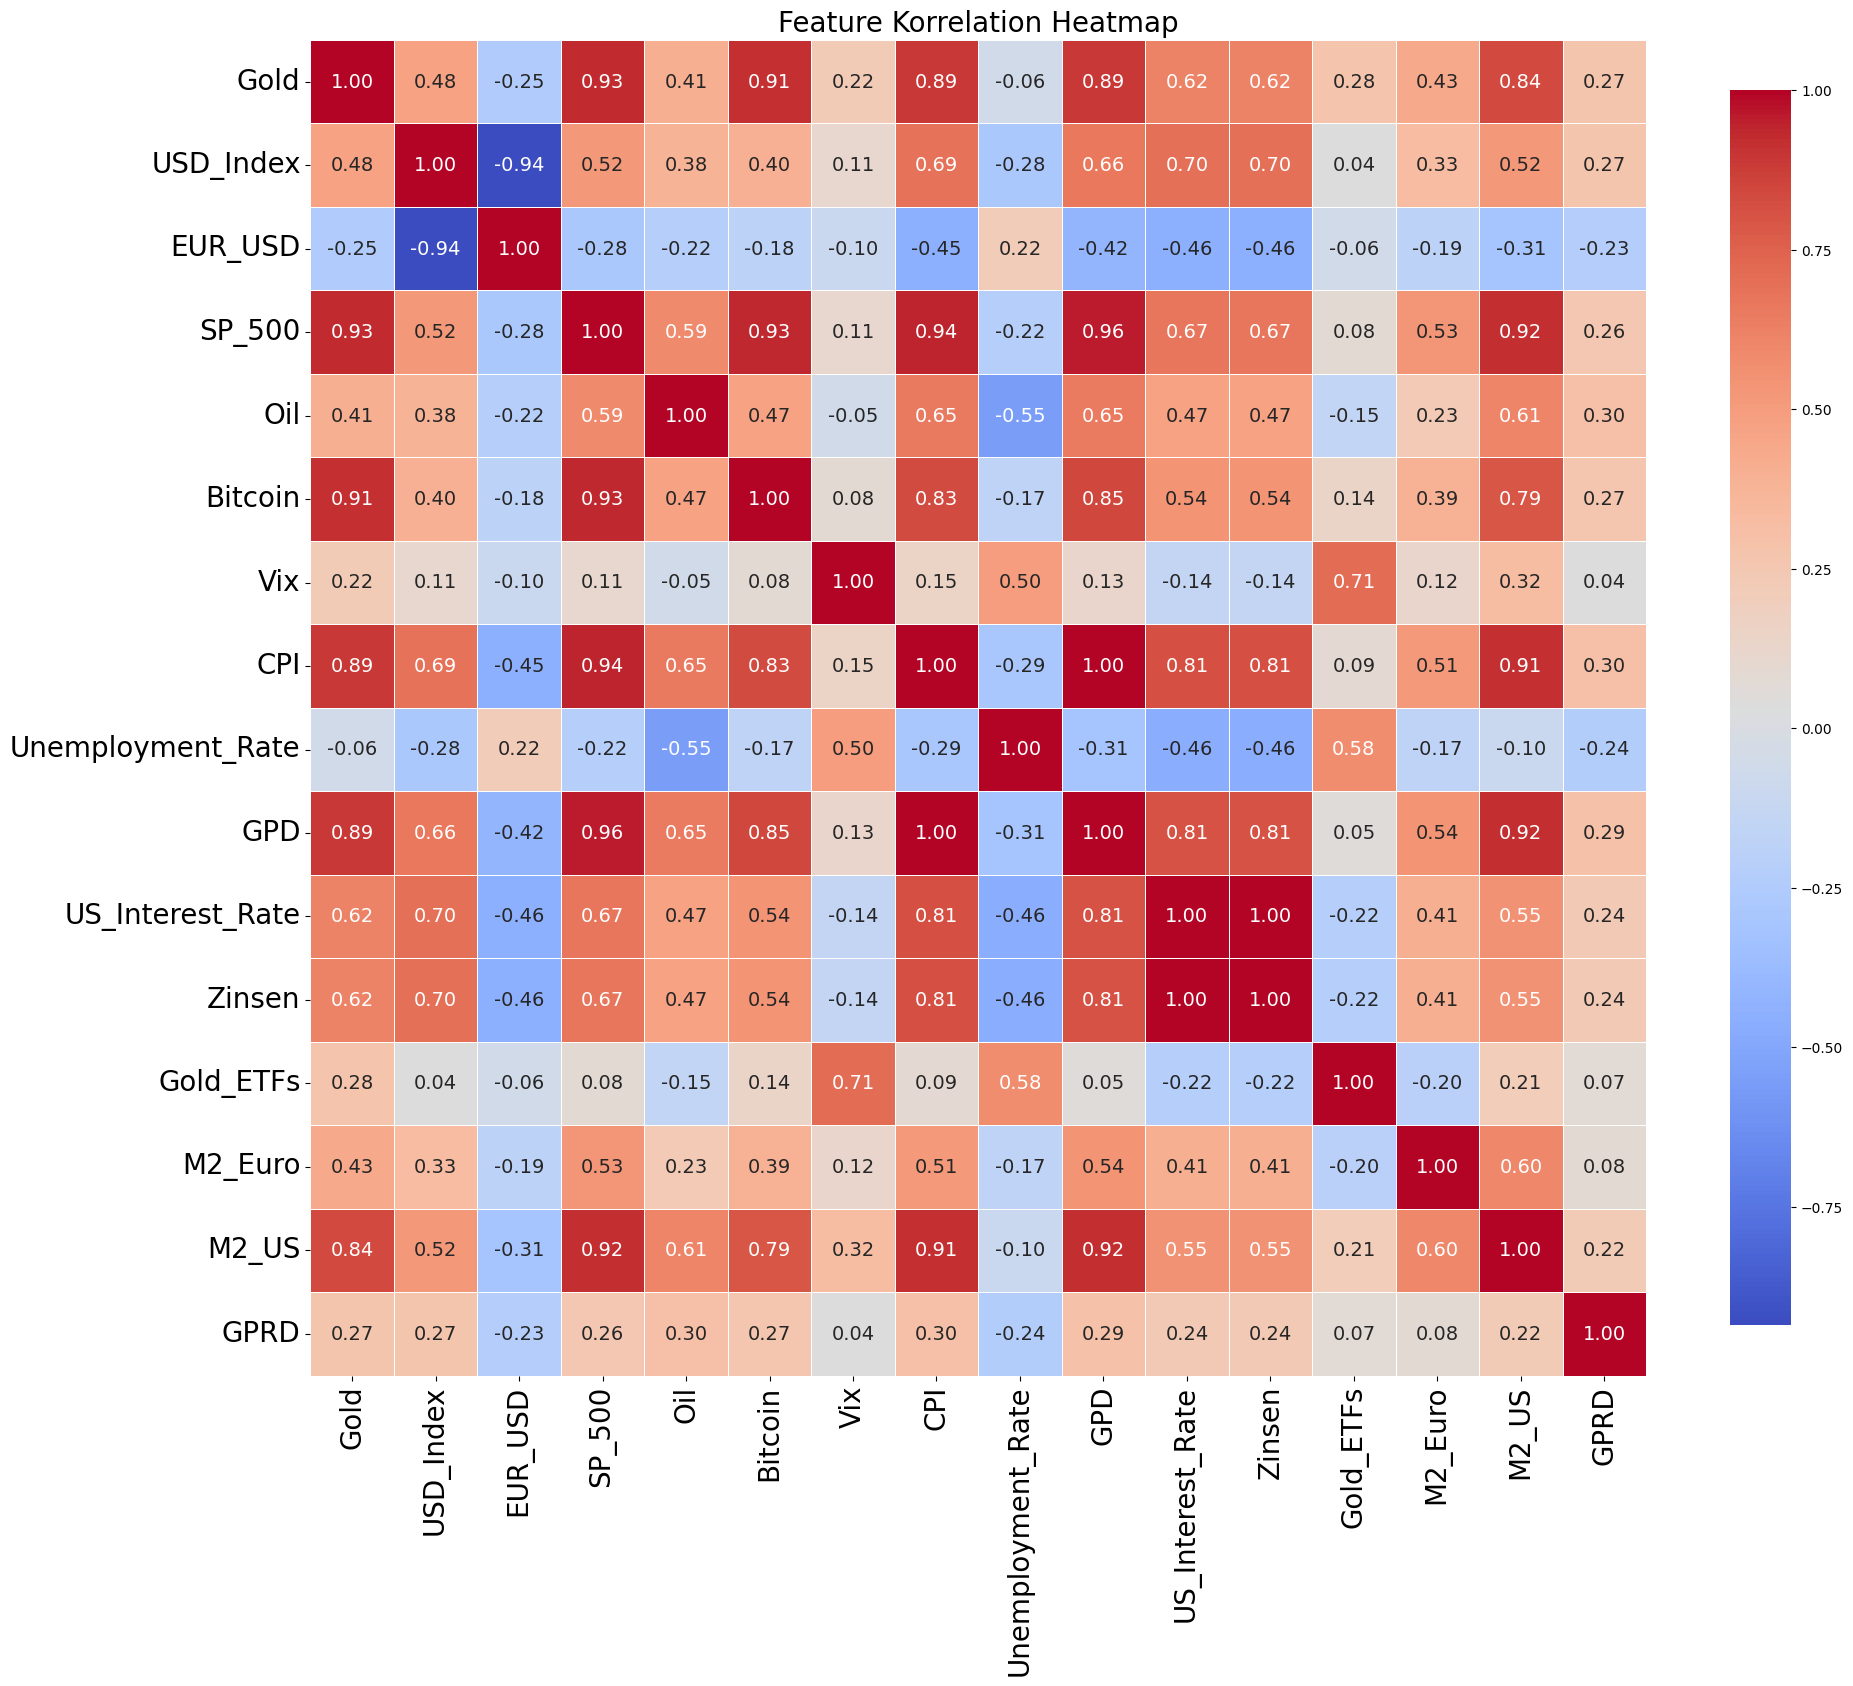

In [11]:
# Korrelation prüfen mit Korrelationsmatrix

# Matrix berechnen (nicht Stationär)
corr_matrix = df.corr()

# Plotting
plt.figure(figsize=(20,25))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={"size": 14}, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Feature Korrelation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

In [12]:
# aus Heatmap sind folgende Features hoch korreliert
# 'Unemployment_Rate', 'EUR_USD', 'Vix', 'GPD' (hoch mit sp500), 'M2_Euro','US_Interest_Rate','Zinsen', 'CPI', 'Bitcoin'

df.drop(['Unemployment_Rate', 'EUR_USD', 'Vix', 'GPD' , 'M2_Euro','US_Interest_Rate','Zinsen', 'CPI', 'Bitcoin'], axis=1, inplace=True)
df.head()

,Gold,USD_Index,SP_500,Oil,Gold_ETFs,M2_US,GPRD
Date,,,,,,,
2014-09-17,1234.400024,84.699997,2001.569946,94.419998,17.140000,11543.06,159.797913
2014-09-18,1225.699951,84.320000,2011.359985,93.070000,15.500000,11545.52,118.057968
2014-09-19,1215.300049,84.800003,2010.400024,92.410004,16.900000,11547.98,132.806259
2014-09-20,1215.300049,84.800003,2010.400024,92.410004,16.746667,11550.44,76.326447
2014-09-21,1215.300049,84.800003,2010.400024,92.410004,16.593333,11552.90,79.820908


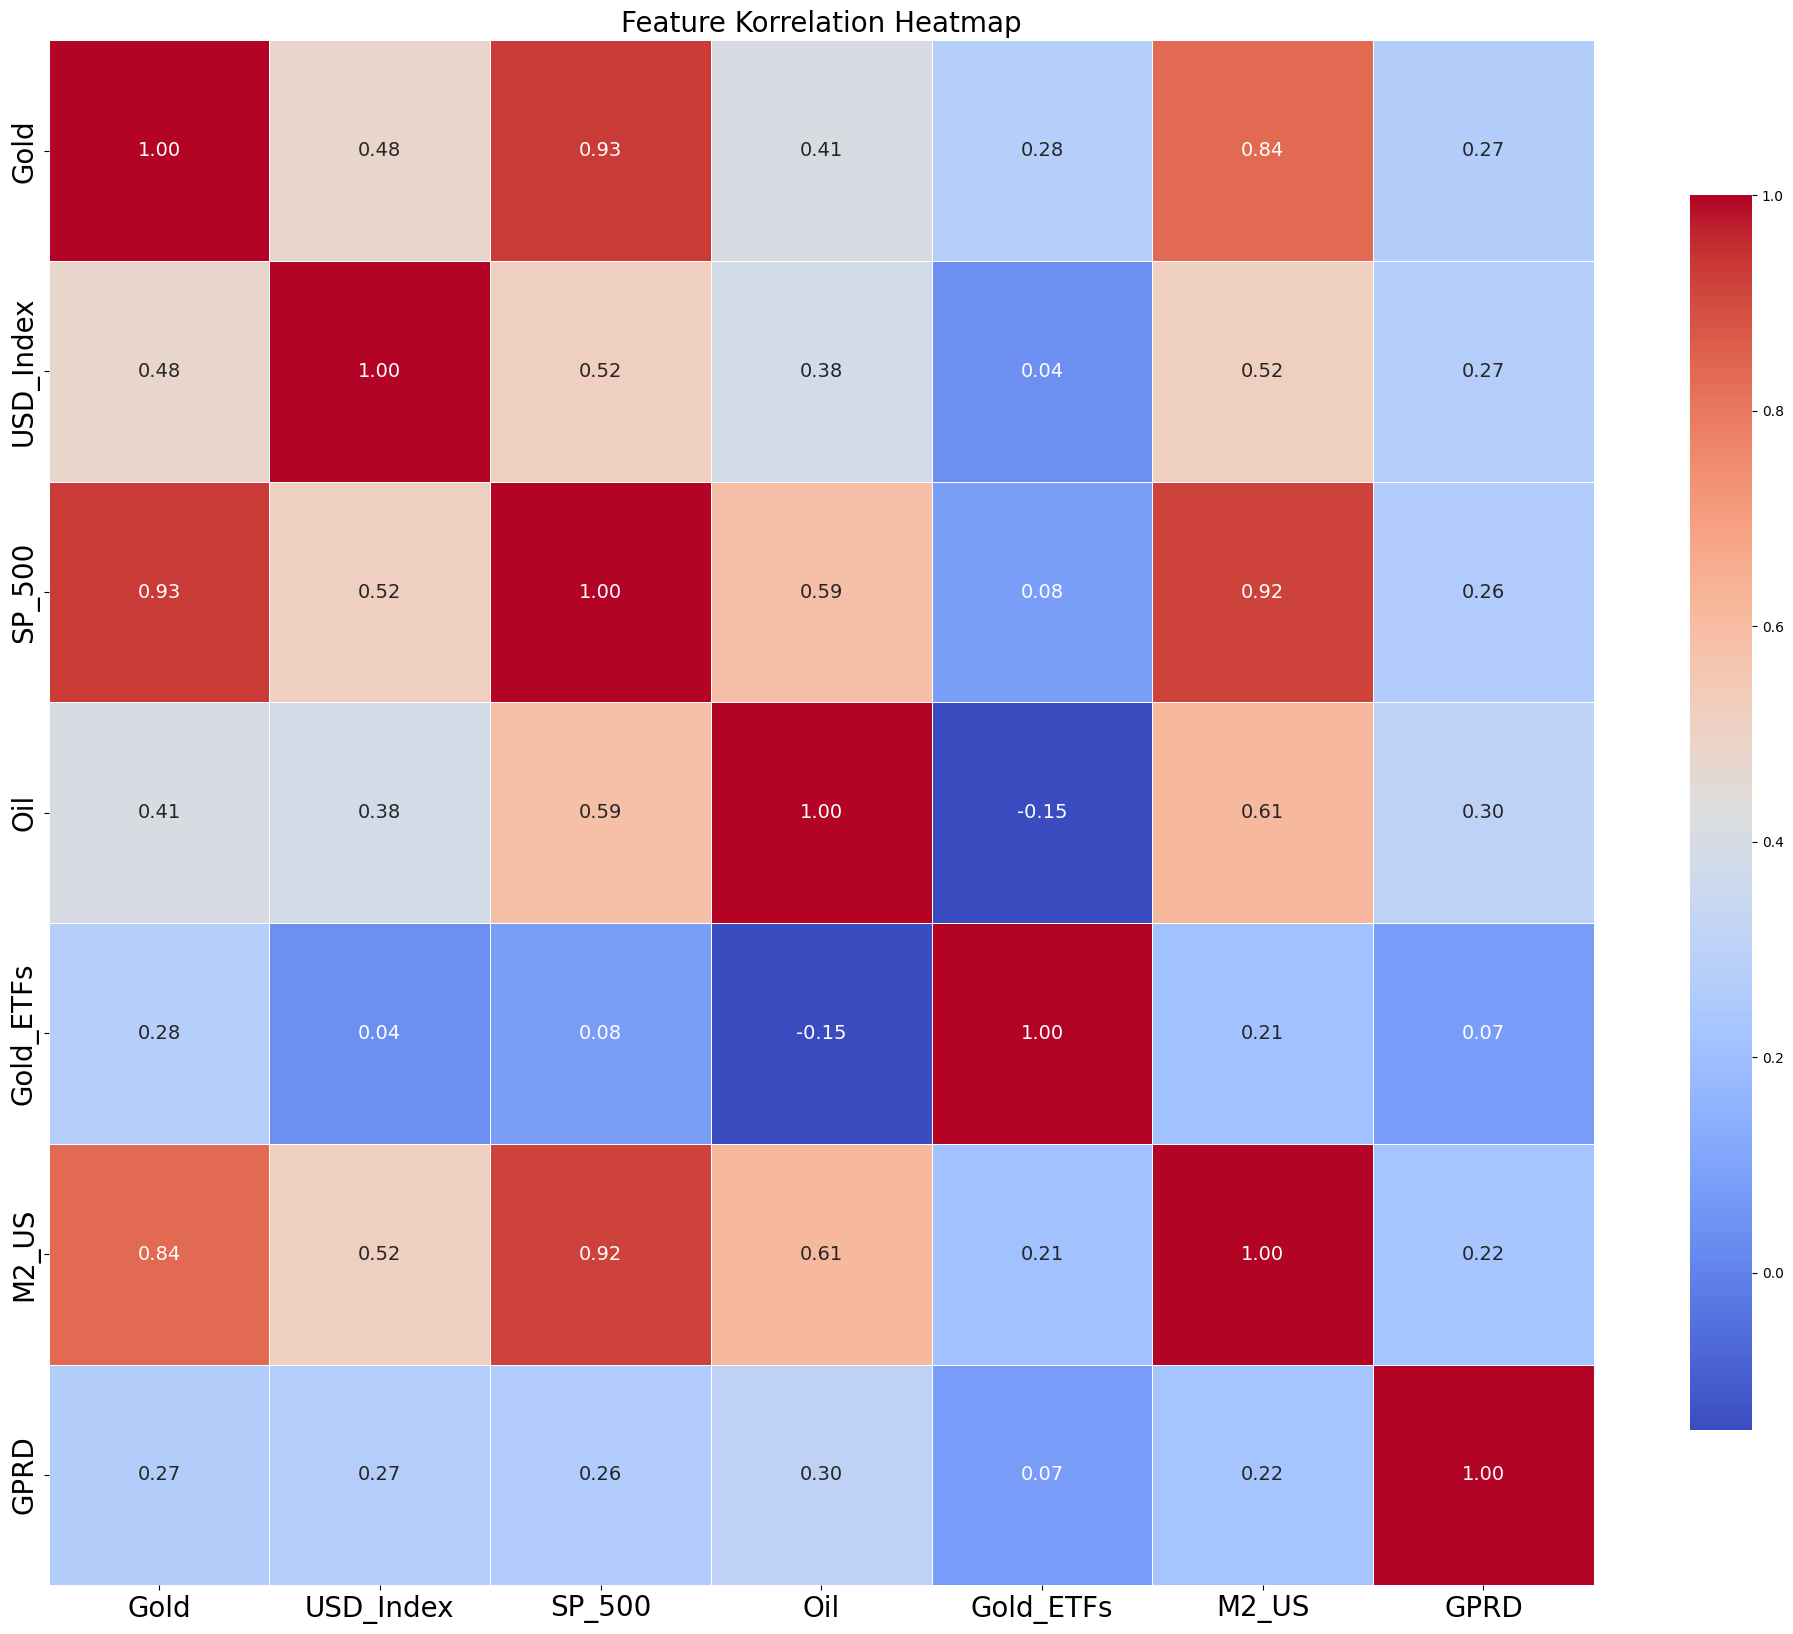

In [13]:
# Korrelation prüfen mit Korrelationsmatrix

# Matrix berechnen (nicht Stationär)
corr_matrix = df.corr()

# Plotting
plt.figure(figsize=(20,25))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',annot_kws={"size": 14}, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Feature Korrelation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()

# 1. Modellierungsversuch

In [ ]:
'''
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Spalten zur besseren Übersichtlichkeit umbenennen
df = df.rename(columns={'Gold': 'gold_price'})
target_col = 'gold_price'
exog_cols = [col for col in df.columns if col != target_col]

# sicherstellen Datum/Uhrzeit-Index 
df.index = pd.to_datetime(df.index)
df = df.sort_index()
'''



"\nimport pandas as pd\nimport numpy as np\nfrom statsmodels.tsa.statespace.sarimax import SARIMAX\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import mean_squared_error\n\n# Rename columns for clarity\ndf = df.rename(columns={'Gold': 'gold_price'})\ntarget_col = 'gold_price'\nexog_cols = [col for col in df.columns if col != target_col]\n\n# Ensure datetime index\ndf.index = pd.to_datetime(df.index)\ndf = df.sort_index()\n"

In [ ]:
'''

future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14, freq='D')

from sklearn.linear_model import LinearRegression

def extrapolate_feature(series, days=14):
    x = np.arange(len(series)).reshape(-1, 1)
    y = series.values
    model = LinearRegression().fit(x, y)
    x_future = np.arange(len(series), len(series) + days).reshape(-1, 1)
    return model.predict(x_future)

# dynamische Zukunftige-Exog erstellen
X_future = pd.DataFrame(index=future_dates)

for col in exog_cols:
    past_series = df[col].iloc[-30:]  # use last 30 days
    X_future[col] = extrapolate_feature(past_series, days=14)
    '''



"\n\nfuture_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14, freq='D')\n\nfrom sklearn.linear_model import LinearRegression\n\ndef extrapolate_feature(series, days=14):\n    x = np.arange(len(series)).reshape(-1, 1)\n    y = series.values\n    model = LinearRegression().fit(x, y)\n    x_future = np.arange(len(series), len(series) + days).reshape(-1, 1)\n    return model.predict(x_future)\n\n# Create dynamic future exog\nX_future = pd.DataFrame(index=future_dates)\n\nfor col in exog_cols:\n    past_series = df[col].iloc[-30:]  # use last 30 days\n    X_future[col] = extrapolate_feature(past_series, days=14)\n    "

In [16]:
'''

y_full = df[target_col]
X_full = df[exog_cols]

model = SARIMAX(
    y_full,
    exog=X_full,
    order=(1, 0, 1),              # You can tune this
    seasonal_order=(0, 0, 0, 0),  # Assuming no seasonality
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False, maxiter=500)
print(results.summary())
'''



'\n\ny_full = df[target_col]\nX_full = df[exog_cols]\n\nmodel = SARIMAX(\n    y_full,\n    exog=X_full,\n    order=(1, 0, 1),              # You can tune this\n    seasonal_order=(0, 0, 0, 0),  # Assuming no seasonality\n    enforce_stationarity=True,\n    enforce_invertibility=True\n)\n\nresults = model.fit(disp=False, maxiter=500)\nprint(results.summary())\n'

In [ ]:
'''

# zukünftige Goldpreise prognostizieren
forecast_14d = results.forecast(steps=14, exog=X_future)

# Index zuweisen
forecast_14d.index = future_dates
forecast_14d
'''


'\n\n# Forecast future gold prices\nforecast_14d = results.forecast(steps=14, exog=X_future)\n\n# Assign index\nforecast_14d.index = future_dates\nforecast_14d\n'

In [18]:
'''

filtered_df = df[df.index >= '2025-06-09']

plt.figure(figsize=(14, 6))
plt.plot(filtered_df.index, filtered_df['gold_price'], label='Historical Gold Price')
plt.plot(forecast_14d.index, forecast_14d, label='Forecasted Gold Price (Next 14 Days)', linestyle='--')
plt.title("Gold Price Forecast - Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''


'\n\nfiltered_df = df[df.index >= \'2025-06-09\']\n\nplt.figure(figsize=(14, 6))\nplt.plot(filtered_df.index, filtered_df[\'gold_price\'], label=\'Historical Gold Price\')\nplt.plot(forecast_14d.index, forecast_14d, label=\'Forecasted Gold Price (Next 14 Days)\', linestyle=\'--\')\nplt.title("Gold Price Forecast - Next 14 Days")\nplt.xlabel("Date")\nplt.ylabel("Gold Price")\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

# 2. Modellierungsversuch

In [ ]:
'''

import numpy as np
import pandas as pd
# Spalten zur besseren Übersichtlichkeit umbenennen
df = df.rename(columns={'Gold': 'gold_price'})
target_col = 'gold_price'
exog_cols = [col for col in df.columns if col != target_col]

# sicherstellen Datum/Uhrzeit-Index 
df.index = pd.to_datetime(df.index)
df = df.sort_index()

future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14, freq='D')
delta_df = df[exog_cols].diff().iloc[-7:]
avg_trend = delta_df.mean()
noise_std = delta_df.std() * 0.5
last_row = df[exog_cols].iloc[-1]

X_future = pd.DataFrame(index=future_dates, columns=exog_cols)

np.random.seed(42)

for i, date in enumerate(future_dates):
    # Linear extrapolation by trend
    value = last_row + (i + 1) * avg_trend
    
    # Gaussian noise around 0, scaled by feature volatility
    noise = np.random.normal(loc=0, scale=noise_std.values)
    
    # Final future feature value = trend + noise
    X_future.loc[date] = value + noise

'''


"\n\nimport numpy as np\nimport pandas as pd\n# Rename columns for clarity\ndf = df.rename(columns={'Gold': 'gold_price'})\ntarget_col = 'gold_price'\nexog_cols = [col for col in df.columns if col != target_col]\n\n# Ensure datetime index\ndf.index = pd.to_datetime(df.index)\ndf = df.sort_index()\n\n# Assume exog_cols = ['Gold', 'USD_Index', 'SP_500', 'Oil', 'Gold_ETFs', 'M2_US', 'GPRD', 'Weekend']\n# df is your original DataFrame indexed by date with these columns\n\n# 1. Future dates for next 14 calendar days\nfuture_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14, freq='D')\n\n# 2. Calculate daily changes (diff) for last 7 days of exogenous features\ndelta_df = df[exog_cols].diff().iloc[-7:]\n\n# 3. Calculate average daily trend per feature\navg_trend = delta_df.mean()\n\n# 4. Calculate noise scale as 50% of recent std deviation of daily changes\nnoise_std = delta_df.std() * 0.5\n\n# 5. Starting point: last known exogenous values\nlast_row = df[exog_cols]

In [20]:
'''

y_full = df[target_col]
X_full = df[exog_cols]

model = SARIMAX(
    y_full,
    exog=X_full,
    order=(1, 0, 1),              # You can tune this
    seasonal_order=(0, 0, 0, 0),  # Assuming no seasonality
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False, maxiter=500)
print(results.summary())
'''



'\n\ny_full = df[target_col]\nX_full = df[exog_cols]\n\nmodel = SARIMAX(\n    y_full,\n    exog=X_full,\n    order=(1, 0, 1),              # You can tune this\n    seasonal_order=(0, 0, 0, 0),  # Assuming no seasonality\n    enforce_stationarity=True,\n    enforce_invertibility=True\n)\n\nresults = model.fit(disp=False, maxiter=500)\nprint(results.summary())\n'

In [21]:
'''

X_future = X_future.astype(float)
forecast_14d = results.forecast(steps=14, exog=X_future)
forecast_14d.index = future_dates
'''


'\n\nX_future = X_future.astype(float)\nforecast_14d = results.forecast(steps=14, exog=X_future)\nforecast_14d.index = future_dates\n'

In [22]:
'''

filtered_df = df[df.index >= '2025-06-09']

plt.figure(figsize=(14, 6))
plt.plot(filtered_df.index, filtered_df['gold_price'], label='Historical Gold Price')
plt.plot(forecast_14d.index, forecast_14d, label='Forecasted Gold Price (Next 14 Days)', linestyle='--')
plt.title("Gold Price Forecast - Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''


'\n\nfiltered_df = df[df.index >= \'2025-06-09\']\n\nplt.figure(figsize=(14, 6))\nplt.plot(filtered_df.index, filtered_df[\'gold_price\'], label=\'Historical Gold Price\')\nplt.plot(forecast_14d.index, forecast_14d, label=\'Forecasted Gold Price (Next 14 Days)\', linestyle=\'--\')\nplt.title("Gold Price Forecast - Next 14 Days")\nplt.xlabel("Date")\nplt.ylabel("Gold Price")\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

# 3. Modellierungsversuch

In [ ]:
import numpy as np
import pandas as pd

df = df.rename(columns={'Gold': 'gold_price'})
target_col = 'gold_price'
exog_cols = [col for col in df.columns if col != target_col]

df.index = pd.to_datetime(df.index)
df = df.sort_index()

future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14, freq='D')

delta_df = df[exog_cols].diff().iloc[-7:]
avg_trend = delta_df.mean()
base_std = delta_df.std()

last_row = df[exog_cols].iloc[-1]

# Function to generate exogenous data with variable noise
def generate_X_future(noise_multiplier=0.5, seed=42):
    np.random.seed(seed)
    noise_std = base_std * noise_multiplier
    X_future = pd.DataFrame(index=future_dates, columns=exog_cols)
    
    for i, date in enumerate(future_dates):
        trend_value = last_row + (i + 1) * avg_trend
        noise = np.random.normal(loc=0, scale=noise_std.values)
        X_future.loc[date] = trend_value + noise
    
    return X_future.astype(float)


X_future_low_noise = generate_X_future(noise_multiplier=0.25)  # More stable
X_future_med_noise = generate_X_future(noise_multiplier=0.5)   # Balanced
X_future_high_noise = generate_X_future(noise_multiplier=1.0)  # Very volatile


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y_full = df[target_col]
X_full = df[exog_cols]

model = SARIMAX(
    y_full,
    exog=X_full,
    order=(1, 0, 1),              
    seasonal_order=(0, 0, 0, 0),  # Assuming no seasonality
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False, maxiter=500)
print(results.summary())

c:\Users\abadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\abadi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             gold_price   No. Observations:                 3932
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -15764.809
Date:                Sun, 22 Jun 2025   AIC                          31547.618
Time:                        22:02:42   BIC                          31604.110
Sample:                    09-17-2014   HQIC                         31567.661
                         - 06-22-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
USD_Index    -14.9570      0.353    -42.351      0.000     -15.649     -14.265
SP_500         0.0122      0.003      4.864      0.000       0.007       0.017
Oil            0.5461      0.047     11.563      0.0

In [45]:
'''

X_future = X_future_low_noise.astype(float)
forecast_14d = results.forecast(steps=14, exog=X_future_low_noise)
forecast_14d.index = future_dates
'''


'\n\nX_future = X_future_low_noise.astype(float)\nforecast_14d = results.forecast(steps=14, exog=X_future_low_noise)\nforecast_14d.index = future_dates\n'

In [46]:
'''

filtered_df = df[df.index >= '2025-06-09']

plt.figure(figsize=(14, 6))
plt.plot(filtered_df.index, filtered_df['gold_price'], label='Historical Gold Price')
plt.plot(forecast_14d.index, forecast_14d, label='Forecasted Gold Price (Next 14 Days)', linestyle='--')
plt.title("Gold Price Forecast - Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''



'\n\nfiltered_df = df[df.index >= \'2025-06-09\']\n\nplt.figure(figsize=(14, 6))\nplt.plot(filtered_df.index, filtered_df[\'gold_price\'], label=\'Historical Gold Price\')\nplt.plot(forecast_14d.index, forecast_14d, label=\'Forecasted Gold Price (Next 14 Days)\', linestyle=\'--\')\nplt.title("Gold Price Forecast - Next 14 Days")\nplt.xlabel("Date")\nplt.ylabel("Gold Price")\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

In [47]:
'''

X_future = X_future_med_noise.astype(float)
forecast_14d = results.forecast(steps=14, exog=X_future_med_noise)
forecast_14d.index = future_dates
'''


'\n\nX_future = X_future_med_noise.astype(float)\nforecast_14d = results.forecast(steps=14, exog=X_future_med_noise)\nforecast_14d.index = future_dates\n'

In [48]:
'''

filtered_df = df[df.index >= '2025-06-09']

plt.figure(figsize=(14, 6))
plt.plot(filtered_df.index, filtered_df['gold_price'], label='Historical Gold Price')
plt.plot(forecast_14d.index, forecast_14d, label='Forecasted Gold Price (Next 14 Days)', linestyle='--')
plt.title("Gold Price Forecast - Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''


'\n\nfiltered_df = df[df.index >= \'2025-06-09\']\n\nplt.figure(figsize=(14, 6))\nplt.plot(filtered_df.index, filtered_df[\'gold_price\'], label=\'Historical Gold Price\')\nplt.plot(forecast_14d.index, forecast_14d, label=\'Forecasted Gold Price (Next 14 Days)\', linestyle=\'--\')\nplt.title("Gold Price Forecast - Next 14 Days")\nplt.xlabel("Date")\nplt.ylabel("Gold Price")\nplt.legend()\nplt.grid(True)\nplt.tight_layout()\nplt.show()\n'

In [49]:
X_future = X_future_high_noise.astype(float)
forecast_14d = results.forecast(steps=14, exog=X_future_high_noise)
forecast_14d.index = future_dates

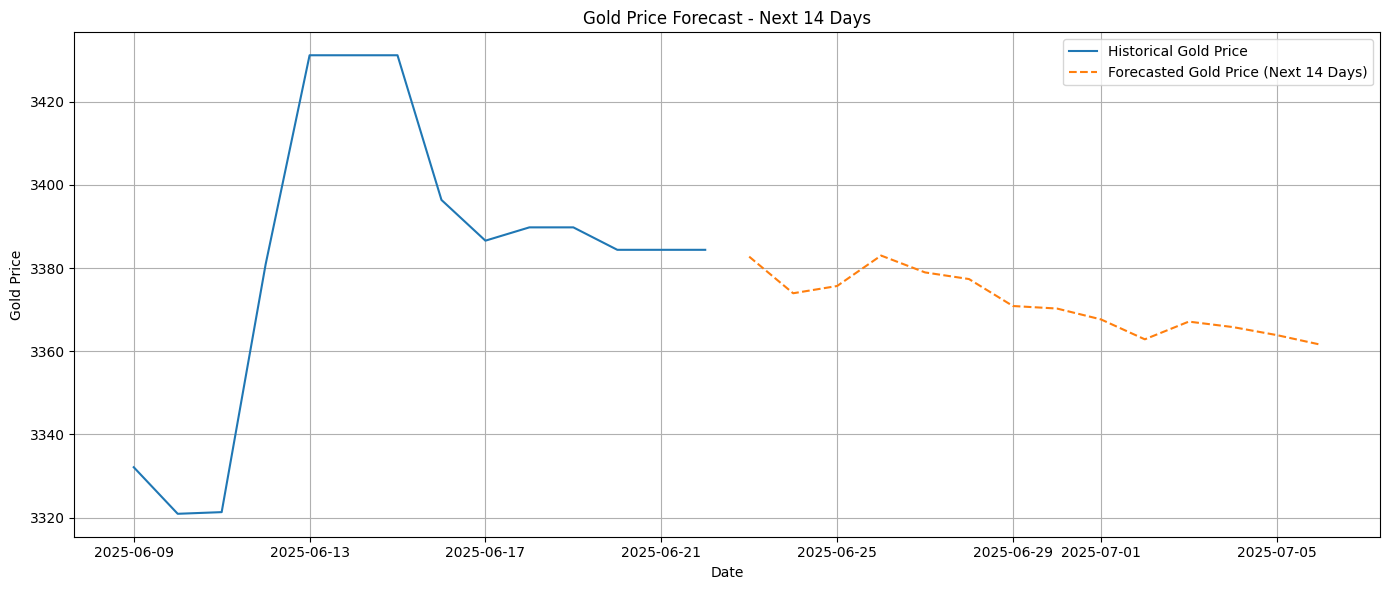

In [50]:
filtered_df = df[df.index >= '2025-06-09']

plt.figure(figsize=(14, 6))
plt.plot(filtered_df.index, filtered_df['gold_price'], label='Historical Gold Price')
plt.plot(forecast_14d.index, forecast_14d, label='Forecasted Gold Price (Next 14 Days)', linestyle='--')
plt.title("Gold Price Forecast - Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
forecast_14d

2025-06-23    3382.760029
2025-06-24    3373.948625
2025-06-25    3375.692692
2025-06-26    3383.019474
2025-06-27    3378.963548
2025-06-28    3377.369024
2025-06-29    3370.880668
2025-06-30    3370.276949
2025-07-01    3367.670127
2025-07-02    3362.870222
2025-07-03    3367.129972
2025-07-04    3365.820092
2025-07-05    3363.890408
2025-07-06    3361.579448
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
forecast_df = forecast_14d.to_frame(name='Prediction')

# Rename index
forecast_df.index.name = 'Date'

# Save to CSV
forecast_df.to_csv('gold_price_forecast.csv')


# Modell testen ohne zukunftige Daten

In [ ]:
'''

# Prediction für die nächsten 14 Tage
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=14, freq='D')

delta_df = df[exog_cols].diff().iloc[-7:]

avg_trend = delta_df.mean()

last_row = df[exog_cols].iloc[-1]

X_future = pd.DataFrame(index=future_dates, columns=exog_cols)

for i, date in enumerate(future_dates):
    X_future.loc[date] = last_row + (i + 1) * avg_trend  # linear trend

#X_future['Weekend'] = X_future.index.weekday >= 5
'''



In [ ]:
'''

X_future = X_future.astype(float)
#'''



In [ ]:
'''

y_full = df[target_col]
X_full = df[exog_cols]

model = SARIMAX(
    y_full,
    exog=X_full,
    order=(1, 0, 1),              # You can tune this
    seasonal_order=(0, 0, 0, 0),  # Assuming no seasonality
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False, maxiter=500)
print(results.summary())
'''



In [ ]:
'''

# Forecast future gold prices
forecast_14d = results.forecast(steps=14, exog=X_future)

# Assign index
forecast_14d.index = future_dates
'''



In [ ]:
'''

filtered_df = df[df.index >= '2025-06-09']

plt.figure(figsize=(14, 6))
plt.plot(filtered_df.index, filtered_df['gold_price'], label='Historical Gold Price')
plt.plot(forecast_14d.index, forecast_14d, label='Forecasted Gold Price (Next 14 Days)', linestyle='--')
plt.title("Gold Price Forecast - Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
'''



In [ ]:
'''

target_col = 'Gold'
exog_cols = [col for col in df.columns if col != target_col]

# Train-test split 
split_index = int(len(df) * 0.999)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

y_train = train[target_col]
X_train = train[exog_cols]

y_test = test[target_col]
X_test = test[exog_cols]
'''


In [ ]:
'''

# Modell bauen
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1,0,0),
    seasonal_order=(0,0,0,0),
    enforce_stationarity=True,
    enforce_invertibility=True
)
results = model.fit(disp=False, maxiter=500)
print(results.summary())
'''


In [ ]:
'''

# Vorhersagen
from sklearn.metrics import mean_squared_error

forcast = results.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, forcast))
print(f'RMSE: {rmse:.4f}')

# Plotting der Ergebnissen
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual Gold Price')
plt.plot(y_test.index, forcast, label='Forcasted Gold Price', linestyle='--')
plt.title("SARIMAX Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()
'''
